In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

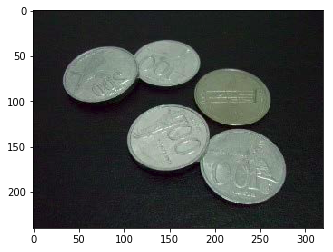

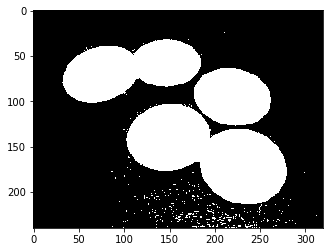

In [87]:
image = cv2.imread("./assets/img/coins.png")
imH, imW, _ = image.shape 
plt.figure()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(gray, 40, 255 , cv2.THRESH_BINARY)
plt.figure()
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))

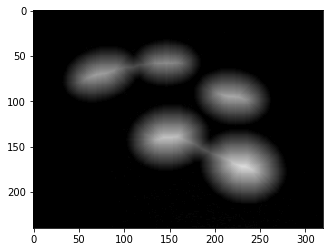

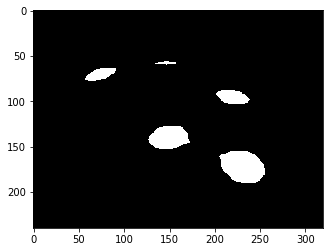

In [88]:
distance_transform = cv2.distanceTransform(thresh, cv2.DIST_L2 ,3)
normalized = cv2.normalize(distance_transform , 0, 50., cv2.NORM_MINMAX)
plt.figure()
plt.imshow(cv2.cvtColor(normalized, cv2.COLOR_GRAY2RGB))

_,thresh1 = cv2.threshold(normalized, .5, 1., cv2.THRESH_BINARY)
plt.figure()
plt.imshow(cv2.cvtColor(thresh1, cv2.COLOR_GRAY2RGB))

In [89]:
thresh1 = np.uint8(thresh1)
_, contours,_ = cv2.findContours(thresh1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

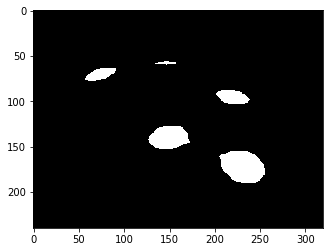

In [90]:
img = np.zeros([imH,imW,1],dtype=np.uint8)
for c in contours:
    cv2.drawContours(img, [c], -1,255,cv2.FILLED)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

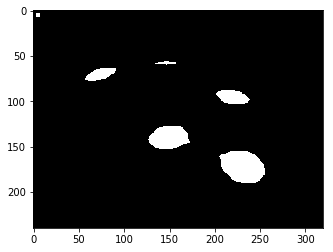

In [91]:
cv2.circle(img, (5,5), 3, (255,255,255), -1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

In [92]:
img.shape

(240, 320, 1)

In [93]:
#ret, markers = cv2.connectedComponents(thresh1)
img = img.astype('int32')
img = cv2.watershed(image, img)
image[img == -1] = [255,0,0]

IndexError: boolean index did not match indexed array along dimension 2; dimension is 3 but corresponding boolean dimension is 1

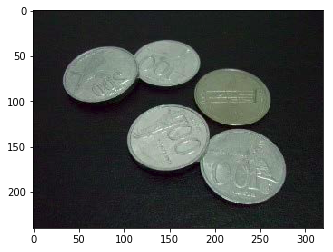

In [86]:

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [54]:
img1 = np.zeros([imH,imW,3],dtype=np.uint8)

In [ ]:
markers.

In [ ]:
In my previous post i mentioned how to contour definite object in image frame, and for any who participated in minesweepers competition will just have one word to say:"THEN WHAT!!".

Contouring is good but for most of us we want to count these contoured object.... it's so simple.

cvFindContours... this function find the contours of the defined objects in our threshold-ed frame..

but also this function returns how many contour was found in the frame..

Code:

int main(){
IplImage* img = cvLoadImage( "D:\\arena.jpg" );
IplImage* hsv = cvCreateImage(cvGetSize(img),IPL_DEPTH_8U,3);
IplImage* bw = cvCreateImage(cvGetSize(img),IPL_DEPTH_8U,1); 
cvCvtColor(img, hsv, CV_BGR2HSV);
cvInRangeS(hsv, cvScalar(0, 0, 0), cvScalar(174, 183, 54), bw); // black

CvSeq* contours; //hold the pointer to a contour in the memory block
CvSeq* result; //hold sequence of points of a contour
CvMemStorage *storage = cvCreateMemStorage(0); 
int i;
i=cvFindContours(bw,storage,&contours,sizeof(CvContour),CV_RETR_EXTERNAL,CV_CHAIN_APPROX_SIMPLE,cvPoint(0,0));
cvDrawContours(bw, contours, cvScalar(255,255,255), cvScalar(255,255,255),CV_FILLED);

printf("%d",i);

cvShowImage("src", bw);
cvShowImage("Origin Arena",img);
cvWaitKey(0);
return 0;
} 


Simple Explain.... we define a pointer that holds the contour points around the object.
imagine it like a pointer searching for the white area in the threshold-ed frame, and when it finds any white area it starts to save point around this area.

1 2 3 4 5 6 7 1  .......... contour number 1
1 2 3 4 5 6 7 8 9 10 1 ...... contour number 2 and so on, when the pointer return to the first defined point around the white area ...it counts a whole rounded contour.

this is a print screen for the output of the previous code..


another Tested Image


